In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import dihedrals, rms
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv
import pandas

### Set parameters 

In [10]:
is_deactivate_warning = True
is_savefigs = True
is_makemovie = False
is_makemovie_from_disk = False

sysname = 'AlanineDipeptide'
# name of PDB file
pdb_filename = "./AlanineDipeptideOpenMM/vacuum.pdb"
# name of DCD file
#output_path = './allegro-data/working_dir/Langevin_working_dir' 
output_path = './allegro-data/working_dir/Langevin_working_dir-test3-plumed/' 
traj_dcd_filename = '%s/traj.dcd' % output_path

csv_filename = "%s/state_data.csv" % output_path
csv_col_idx = 2

if is_deactivate_warning :
    import warnings
    warnings.filterwarnings("ignore")    
    
if is_makemovie :
    import moviepy.editor as mpy
    from time import sleep
    # display the gif in this notebook
    from IPython import display

### Load trajectory data 

In [11]:
# load the trajectory data from DCD file
u = mda.Universe(pdb_filename, traj_dcd_filename)
# load the reference configuration from the PDB file
ref = mda.Universe(pdb_filename) 

# print some information
print ('residues: ', u.residues)
print ('trajectory: ', u.trajectory)
print ('reference: ', ref.trajectory)

# display the trajectory
view = nv.show_mdanalysis(u)
print ('number of frames: %d ' % view.max_frame)
view

residues:  <ResidueGroup [<Residue ACE, 1>, <Residue ALA, 2>, <Residue NME, 3>]>
trajectory:  <DCDReader ./allegro-data/working_dir/Langevin_working_dir-test3-plumed//traj.dcd with 10000 frames of 22 atoms>
reference:  <PDBReader ./AlanineDipeptideOpenMM/vacuum.pdb with 1 frames of 22 atoms>
number of frames: 9999 


NGLWidget(max_frame=9999)

### Generate plots

Ramachandran plot saved to file: ././allegro-data/working_dir/Langevin_working_dir-test3-plumed//AlanineDipeptide_Ramachandran.eps


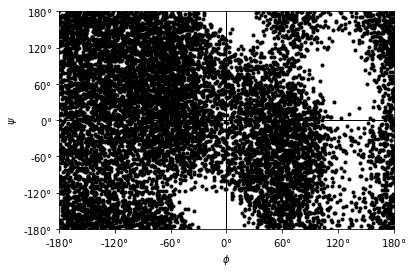

In [12]:
# generate the Ramachandran plot of two dihedral angles
ax = plt.gca()
r = dihedrals.Ramachandran(u.select_atoms('resid 2')).run()
r.plot(ax, color='black', marker='.') #, ref=True)

if is_savefigs :
    fig_filename_Ramachandran = './%s/%s_Ramachandran.eps' % (output_path, sysname)
    plt.savefig(fig_filename_Ramachandran)
    print ('Ramachandran plot saved to file: %s' % fig_filename_Ramachandran)

RMSD plot saved to file: ././allegro-data/working_dir/Langevin_working_dir-test3-plumed//AlanineDipeptide_rmsd.eps


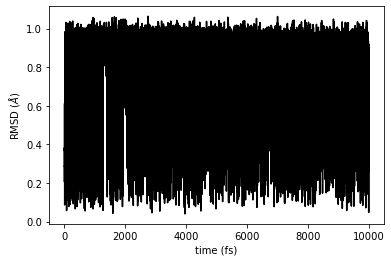

In [5]:
# select atoms for RMSD computation below 
selector = 'name N or name CA or name C'
# compute RMSD of the trajectory wrt the reference configuration
R = rms.RMSD(u, ref, select=selector)          
R.run()
# get the RMSD result
rmsd = R.results.rmsd.T   # transpose makes it easier for plotting

plt.plot(rmsd[0,:], rmsd[2,:], 'k-')
plt.xlabel("time (fs)")
plt.ylabel(r"RMSD ($\AA$)")

if is_savefigs :
    fig_filename_rmsd = './%s/%s_rmsd.eps' % (output_path, sysname) 
    plt.savefig(fig_filename_rmsd)    
    print ('RMSD plot saved to file: %s' % fig_filename_rmsd)

### Plot state data from CSV file

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Index(['#"Time (ps)"', 'Potential Energy (kJ/mole)', 'Total Energy (kJ/mole)',
       'Temperature (K)'],
      dtype='object')
Potential Energy saved to file: ././allegro-data/working_dir/Langevin_working_dir-test3-plumed//AlanineDipeptide_csv2.eps


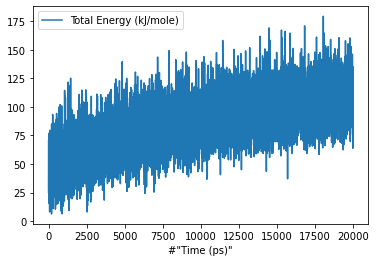

In [6]:
df1 = pandas.read_csv(csv_filename)
print (df1.columns)
df1.plot(kind='line', x='#"Time (ps)"', y=df1.columns[csv_col_idx])

if is_savefigs :
    fig_filename= './%s/%s_csv%d.eps' % (output_path, sysname, csv_col_idx) 
    plt.savefig(fig_filename)    
    print ('Potential Energy saved to file: %s' % fig_filename)

### Make a movie out of trajectory data (experimental)

In [ ]:
if is_makemovie :
    n_frame = 10
    download_dir = '~/Downloads'
    if is_makemovie_from_disk == False :
        # to save time for this tutorial, we make a movie with only a few frames
        # this for loop will generate many png pictures.
        for frame in range(0, n_frame):
            # set frame to update coordinates
            view.frame = frame
            # make sure to let NGL spending enough time to update coordinates
            sleep(0.5)
            filename = 'tmp{}.png'.format(frame)
            print ('frame %d saved to file: %s' % (frame, filename) )
            view.download_image(filename=filename)
            # make sure to let NGL spending enough time to render before going to next frame
            sleep(2.0)

    template = '%s/tmp{}.png' % download_dir
    # get all (sorted) image files
    imagefiles = [template.format(str(i)) for i in range(0, n_frame, 2)]
    # make a gif file
    frame_per_second = 8
    im = mpy.ImageSequenceClip(imagefiles, fps=frame_per_second)
    #image_file = '%s/tmp0.png' % download_dir
    #im = mpy.ImageClip(image_file, duration=3)
    #print (im.get_frame(3).shape)
    im.write_gif('./%s/my_movie.gif' % output_path, fps=frame_per_second)

    display.HTML("<img src='my_movie.gif'></img>")